# Лабораторная работа 5
> Выполнена студентом: **Гусаровым А.С. 22ВВИм2**

Цель лабораторной работы:
Реализация цветовой сегментации

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


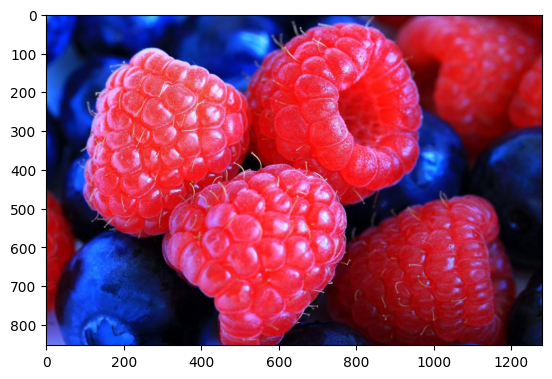

In [2]:
image = cv.imread('lab5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_rgb)
plt.show()

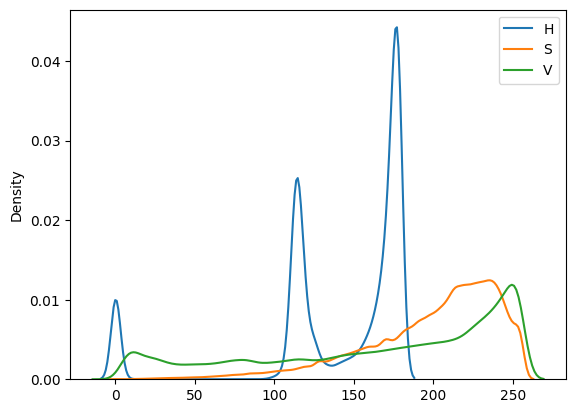

In [3]:
for layer in range(image_hsv.shape[-1]):
	lv = image_hsv[...,layer].flatten()
	sns.kdeplot(lv)
plt.legend(labels=['H', 'S', 'V'])

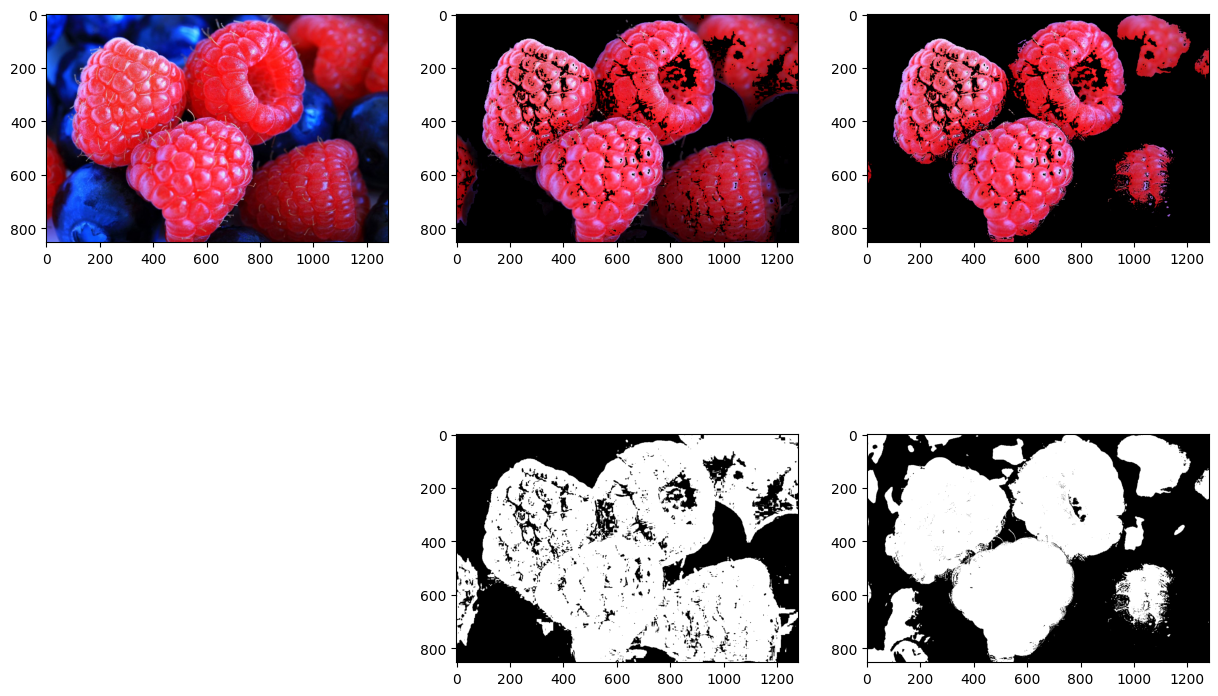

In [4]:
mask_h = cv.inRange(image_hsv[...,0], 130, 240)
mask_v = cv.inRange(image_hsv[...,2], 185, 255)
result_h = cv.bitwise_and(image_rgb, image_rgb, mask=mask_h)
result_v = cv.bitwise_and(result_h, result_h, mask=mask_v)

plt.figure(figsize=(15,20))
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_h, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(mask_v, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(result_h)
plt.subplot(2, 3, 3)
plt.imshow(result_v)
plt.show()

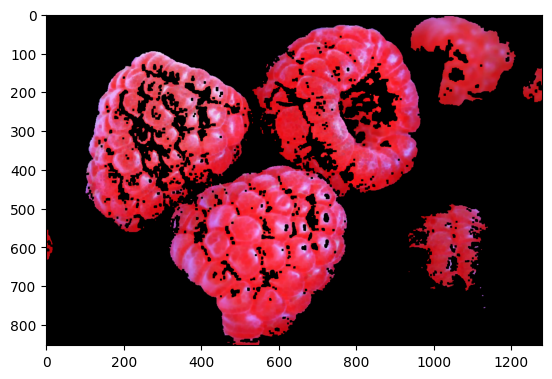

In [11]:
result_v = cv.dilate(result_v, np.ones((3,3), np.int8))
result_v = cv.erode(result_v, np.ones((2,2), np.int8))
plt.imshow(result_v)


In [6]:
from sklearn.cluster import DBSCAN

points = []


In [7]:
gray_image = cv.cvtColor(result_v, cv.COLOR_RGB2GRAY)

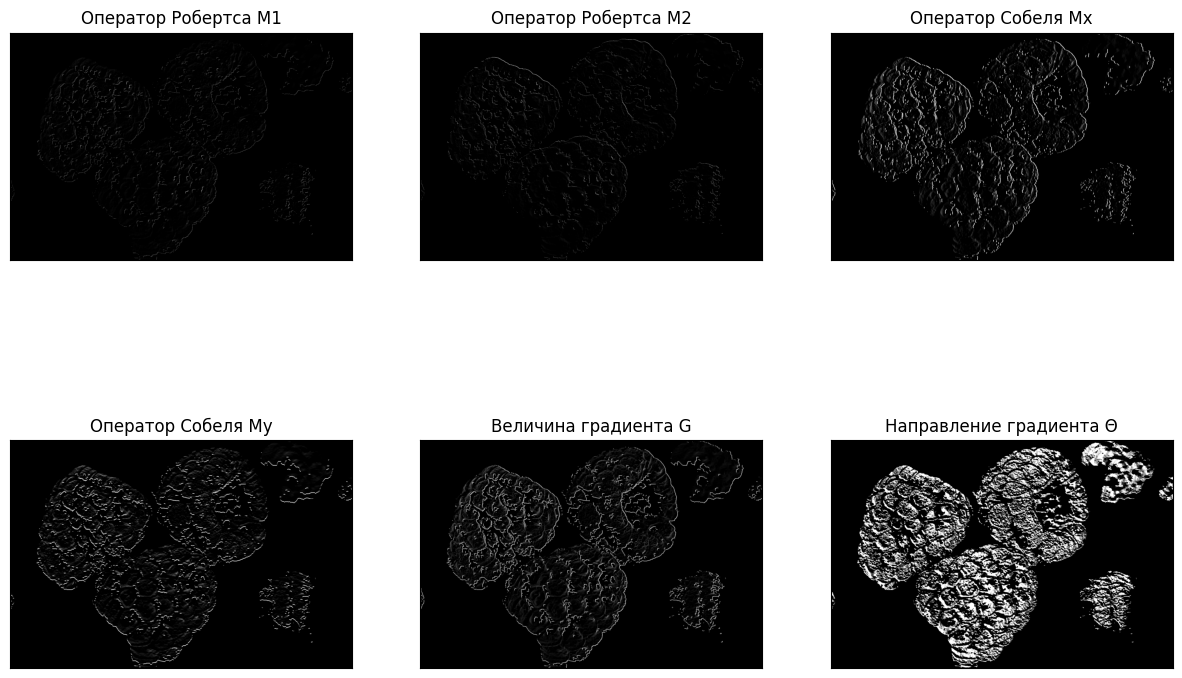

In [8]:
M1 = np.asarray([[1, 0], [0, -1]])
M2 = np.asarray([[0, -1], [1, 0]])
Mx = np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
My = np.asarray([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

kernels = [M1, M2, Mx, My]

gs = plt.GridSpec(3, 3)
plt.figure(figsize=(15, 15))

titles = ['Оператор Робертcа M1', 'Оператор Робертcа M2', 'Оператор Собеля Mх',
          'Оператор Собеля My', 'Величина градиента G', 'Направление градиента Θ']
numberOfImage = 6
shape = gray_image.shape
filtered_images = np.empty(shape[0] * shape[1] * numberOfImage).reshape(shape[0], shape[1], numberOfImage)

for i in np.arange(numberOfImage - 2):
    filtered_images[..., i] = cv.filter2D(gray_image, -1, kernels[i])

filtered_images[..., 4] = np.sqrt(filtered_images[..., 2] ** 2 + filtered_images[..., 3] ** 2)
filtered_images[..., 5] = np.arctan2(filtered_images[..., 3], filtered_images[..., 2])

for i in np.arange(numberOfImage):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(filtered_images[..., i], cmap='gray')

plt.show()